,,,
,Fonctions,Nom & Prénom,
,Professeure de l'enseignement supérieur encadrant,Mme Naoual BERBICHE,
,Membre de l'équipe de PFE SIBD 2019-2020,M.Mohammed Ali DRIOUECH,
,Membre de l'équipe de PFE SIBD 2019-2020,M.Mourad EDDIOUANI,


Date du premier cas de Covid19 dans la liste des pays Lundi 27 janvier 2020
Pays du premier cas de Covid19 dans la liste des pays Germany


Text(0.5, 1.0, 'Evolution du nombre cumulé de décès par 100 malades à partir du 1er jour de contamination')

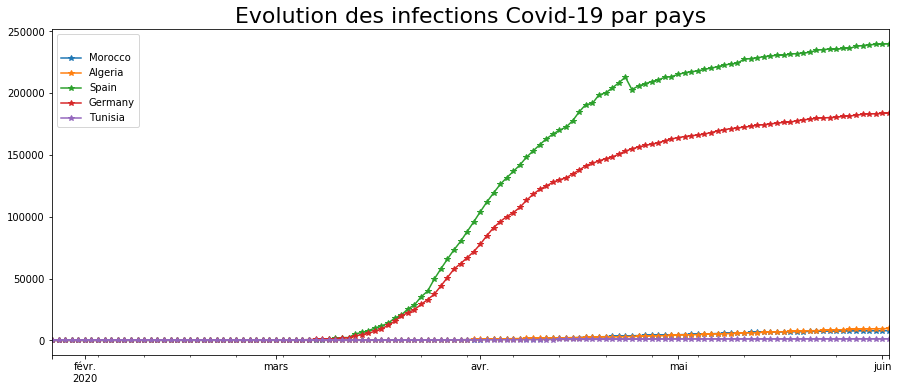

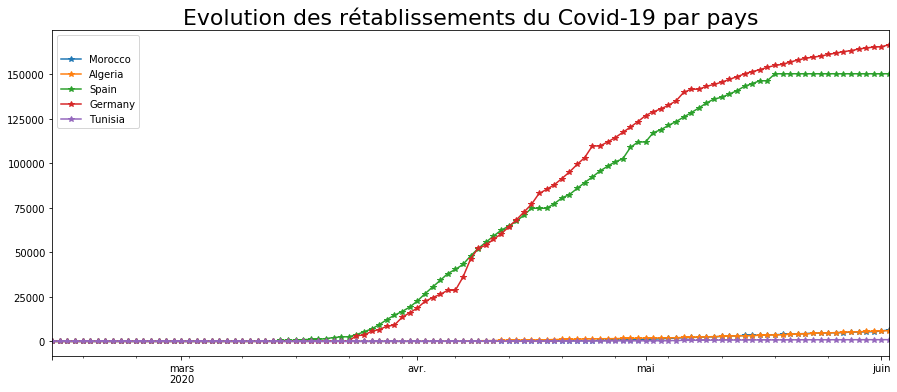

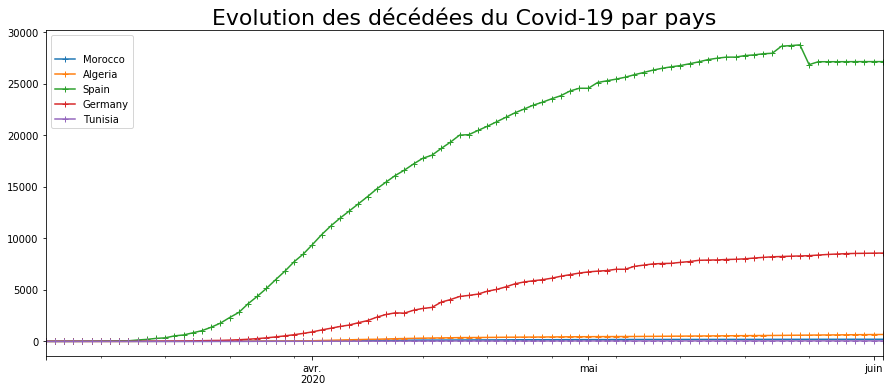

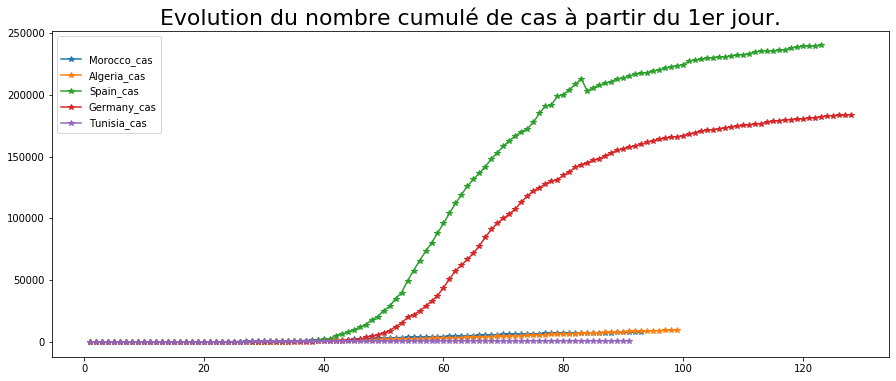

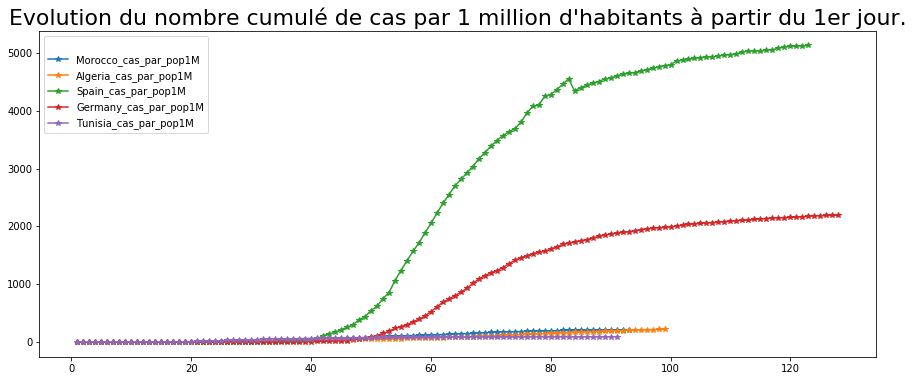

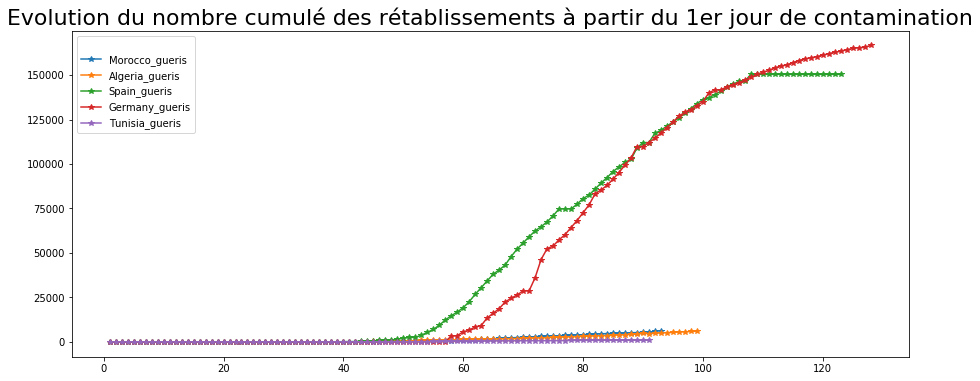

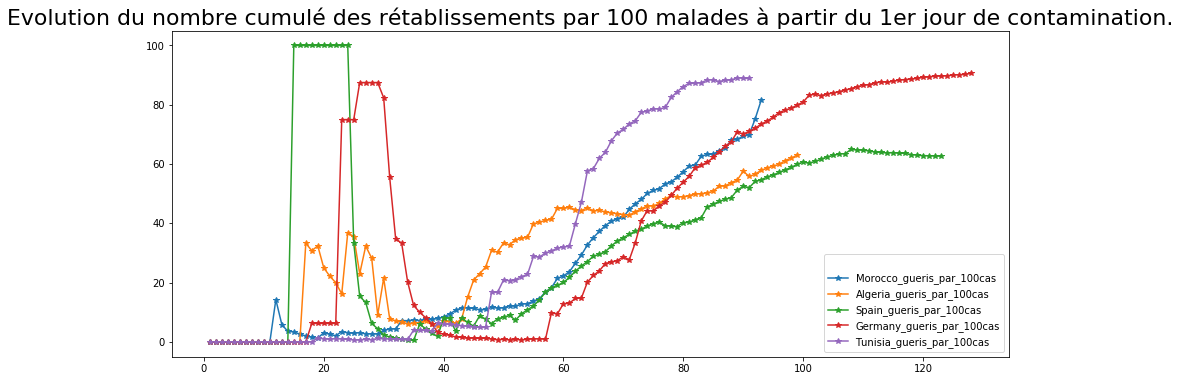

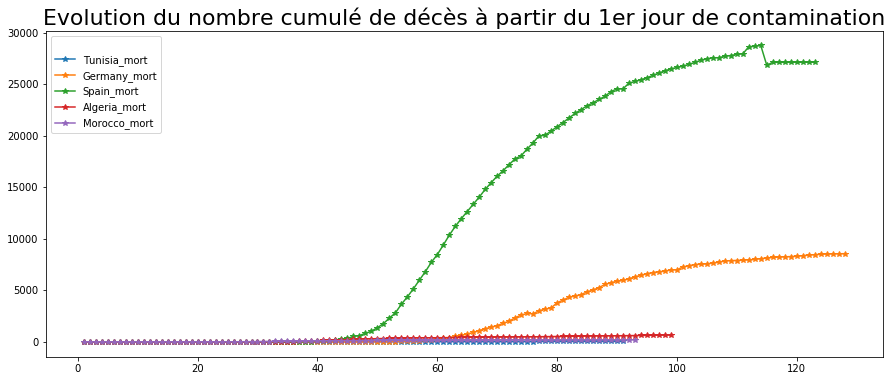

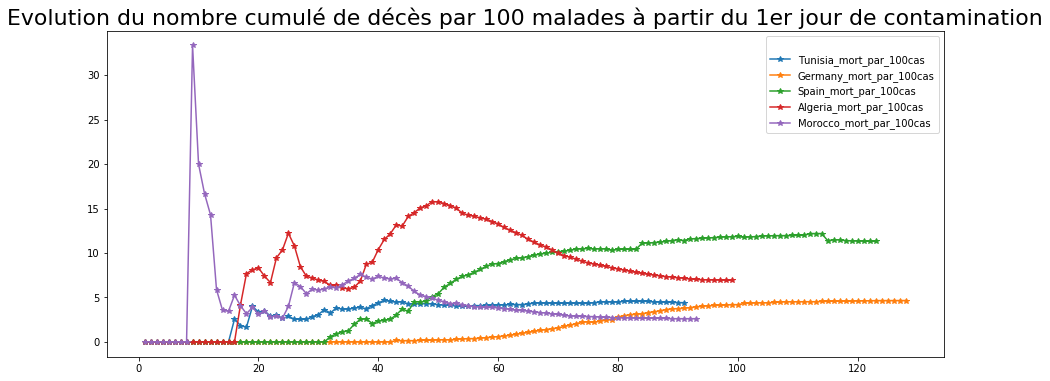

In [2]:
import locale
locale.setlocale(locale.LC_ALL,'fr_FR.UTF-8')
import pandas as pd
import datetime as dt
import plotly.graph_objects as g
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import requests 
import html5lib
import json
from bs4 import BeautifulSoup
import re
from IPython.core.display import display, HTML
# Chargement des données mondiales github
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_recovred = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed = pd.read_csv(url_confirmed, error_bad_lines=False)
recovred = pd.read_csv(url_recovred, error_bad_lines=False)
deaths= pd.read_csv(url_deaths, error_bad_lines=False)

# liste des pays de traitement 

#liste des pays 
pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
# Filtrage des données par pays.
countries_list_recovred = recovred.loc[recovred['Country/Region'].isin(pays)].copy().reset_index(drop=True)
countries_list_confirmed = confirmed.loc[confirmed['Country/Region'].isin(pays)].copy().reset_index(drop=True)
countries_list_deaths = deaths.loc[deaths['Country/Region'].isin(pays)].copy().reset_index(drop=True)
"""
------------------------------------------------------
"""
pays_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
pays_df =pays_df.rename(columns={'Country_Region':'country'})
#total par type de cas 
confirmed_total = int(pays_df['Confirmed'].sum())
deaths_total = int(pays_df['Deaths'].sum())
recovered_total = int(pays_df['Recovered'].sum())
active_total = int(pays_df['Active'].sum())
# publication des totaux de cas au niveau Mondial 
display(HTML("<p style='color: gray; font-size:15px'>Projet Fin d'étude ESTS-Um5 Rabat SIBD 2019-2020:</p>"+
             "<table><tr><th><img src='ests.png' alt='EST Salé' style='width:200px;height:200px;'></th><th></th><th></th><th><img src='um5.png' alt='Université Mohammed V Rabat' style='width:200px;height:200px;'></th></tr>"+
             "<tr> <td></td><td>Fonctions</td><td>Nom & Prénom </td><td></td></tr>"+
             "<tr><td></td><td>Professeure de l'enseignement supérieur encadrant </td> <td>Mme Naoual BERBICHE</td><td></td></tr>"+
             "<tr><td></td><td>Membre de l'équipe de PFE SIBD 2019-2020</td> <td>M.Mohammed Ali DRIOUECH</td><td></td></tr>"+
             "<tr><td></td><td>Membre de l'équipe de PFE SIBD 2019-2020</td> <td>M.Mourad EDDIOUANI</td><td></td></tr>"+
             "</table><h4> Situation Covid-19 Au niveau Mondial</h4><div style = 'background-color: #504e4e; padding: 20px '>" + 
             "<span style='color: green; font-size:15px;margin-left:20px'> Cas Confirmés : "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:15px;margin-left:20px;'> Cas Décédés : " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:15px; margin-left:20px;'> Cas Rétablis: " + str(recovered_total) + "</span>"+
             "<span style='color: pink; font-size:15px; margin-left:20px;'> Cas Actifs: " + str(active_total) + "</span>"+
             "</div>")
       )
"""
------------------------------------------------------
"""

# Transformer les dataframes en séries temporelles . 
def to_series(df):
    #supprimer les colonnes 'Province/State','Lat','Long'
    df_trans = df.drop(columns=['Province/State','Lat','Long']).rename(columns={'Country/Region':' '}).set_index(' ').transpose()
    #transposer le dataframe on index colonne date 
    df_trans.index = pd.to_datetime(df_trans.index)
    return(df_trans)
#création des séries temporelles cas : rétablis,confirmés ,décès
serie_recovred = to_series(countries_list_recovred)     
serie_confirmed = to_series(countries_list_confirmed)
serie_deaths = to_series(countries_list_deaths)

# Date du premier cas de Covid19 dans la liste des pays : 
print('Date du premier cas de Covid19 dans la liste des pays',serie_confirmed.loc[serie_confirmed.sum(axis=1) > 0].index[0].date().strftime('%A %d %B %Y').capitalize())
# Pays du premier cas de Covid19 dans la liste des pays : Germany
print('Pays du premier cas de Covid19 dans la liste des pays '+', '.join(list(serie_confirmed.loc[serie_confirmed.loc[serie_confirmed.sum(axis=1) > 0].index[0]].loc[serie_confirmed.loc[serie_confirmed.loc[serie_confirmed.sum(axis=1) > 0].index[0]] == True].index)))
# suppression de la première partie nulle (0) dans tous les pays de la liste 
serie_confirmed = serie_confirmed.loc[serie_confirmed.loc[serie_confirmed.sum(axis=1) > 0].index[0]:]
serie_deaths = serie_deaths.loc[serie_deaths.loc[serie_deaths.sum(axis=1) > 0].index[0]:]
serie_recovred = serie_recovred.loc[serie_recovred.loc[serie_recovred.sum(axis=1) > 0].index[0]:]


#affichage des données : 




fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_confirmed['Morocco'],
    x=serie_confirmed.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Algeria'],
    x=serie_confirmed.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Spain'],
    x=serie_confirmed.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Germany'],
    x=serie_confirmed.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_confirmed['Tunisia'],
    x=serie_confirmed.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des infections Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()

# Nombre des confirmés
serie_confirmed[['{}'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution des infections Covid-19 par pays',fontdict={'fontsize': 22})

# Nombre des guérisons

fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_recovred['Morocco'],
    x=serie_recovred.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Algeria'],
    x=serie_recovred.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Spain'],
    x=serie_recovred.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Germany'],
    x=serie_recovred.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_recovred['Tunisia'],
    x=serie_recovred.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des rétablissements Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()
serie_recovred[['{}'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution des rétablissements du Covid-19 par pays',fontdict={'fontsize': 22})


# Nombre des décès
fig = g.Figure()
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
fig.add_trace(g.Scatter(
    y=serie_deaths['Morocco'],
    x=serie_deaths.index,
    name='Morocco'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Algeria'],
    x=serie_deaths.index,
    name='Algeria'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Spain'],
    x=serie_deaths.index,
    name='Spain'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Germany'],
    x=serie_deaths.index,
    name='Germany'
))

fig.add_trace(g.Scatter(
    y=serie_deaths['Tunisia'],
    x=serie_deaths.index,
    name='Tunisia'
))

fig.update_layout(title="Evolution des décédées Covid-19 par pays", legend_title='<b> Pays </b>', hovermode="x")
fig.show()
serie_deaths[['{}'.format(i) for i in pays]].plot(marker='+',figsize=(15,6)).set_title('Evolution des décédées du Covid-19 par pays',fontdict={'fontsize': 22})
"""
Web Scraping 
"""

url = "https://www.worldometers.info/world-population/population-by-country/"
req = requests.get(url)
page = BeautifulSoup(req.text,'html5lib')
noeuds = page.find('div','table-responsive') # div de classe table-responsive
region = noeuds.find('table','table table-striped table-bordered') #extraction du tableau de classe table table-striped table-bordered 
tete = region.find('thead') # extraction des thead du tableau
tete_tr = tete.find_all("th")[1:] #extraction d'ensemble de en-tété thead
noms = [tete_tr[i].text for i in range(len(tete_tr))] # nom des pays à partir des en-tété 
corps = region.find('tbody') # extraction du corps du tableau 
corps_tr = corps.find_all('tr') # extraction l'ensemble des lignes 
conteneur = {}
for j in range(len(noms)):# bouble à partir corps du tableau on ajoute le pays et les données associé sur le td 
    conteneur[noms[j]] = [corps_tr[i].find_all("td")[1:][j].text for i in range(len(corps_tr))]
datas = pd.DataFrame.from_dict(conteneur)# création dataframe à partir du fichier json ou dict
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']
population2020 = datas.loc[datas['Country (or dependency)'].isin(pays)][['Country (or dependency)','Population (2020)']].copy().reset_index(drop=True).rename(columns={'Country (or dependency)':'Pays', 'Population (2020)':'Population_2020'})
# supprimer la présentation anglaise des chiffres :
population2020['Population_2020'] = population2020['Population_2020'].str.replace(',','').astype(int)

#Comparaison du comportement de chaque pays

def merge_df(name):
    df = serie_confirmed[[name]].copy()
    df.loc[serie_recovred.index, '{}_gueris'.format(name)] = serie_recovred[name].copy()
    df.loc[serie_deaths.index, '{}_mort'.format(name)] = serie_deaths[name].copy()
    df = df.rename(columns={name:'{}_cas'.format(name)})
    df = df.loc[df['{}_cas'.format(name)] > 0]
    df['{}_cas_par_pop1M'.format(name)] = round(1000000*df['{}_cas'.format(name)] /int(population2020.loc[population2020.loc[population2020['Pays']==name].index, 'Population_2020']), 2)
    df['{}_mort_par_100cas'.format(name)] = round(100*df['{}_mort'.format(name)] / df['{}_cas'.format(name)], 2)
    df['{}_gueris_par_100cas'.format(name)] = round(100*df['{}_gueris'.format(name)] / df['{}_cas'.format(name)], 2)
    df = df.fillna(0)
    df = df.reset_index(drop=True)
    df.index = df.index+1
    return df
#pays = ['Morocco', 'Algeria', 'Spain', 'Germany', 'Tunisia']

Maroc = merge_df('Morocco')
Algeria = merge_df('Algeria')
Spain= merge_df('Spain')
Germany = merge_df('Germany')
Tunisia = merge_df('Tunisia')
Full_datas = pd.concat([Maroc, Algeria,Spain, Germany, Tunisia], axis=1)

Full_datas[['{}_cas'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de cas à partir du 1er jour.',fontdict={'fontsize': 22})
Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title("Evolution du nombre cumulé de cas par 1 million d'habitants à partir du 1er jour.",fontdict={'fontsize': 22})

# Nombre des rétablis du covid19   par 100 contaminations
Full_datas[['{}_gueris'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé des rétablissements à partir du 1er jour de contamination',fontdict={'fontsize': 22})
Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé des rétablissements par 100 malades à partir du 1er jour de contamination.',fontdict={'fontsize': 22})

# Nombre de décès du covid19 puis par 100 contaminations
Full_datas[['{}_mort'.format(i) for i in pays[::-1]]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de décès à partir du 1er jour de contamination',fontdict={'fontsize': 22})
Full_datas[['{}_mort_par_100cas'.format(i) for i in pays[::-1]]].plot(marker='*',figsize=(15,6)).set_title('Evolution du nombre cumulé de décès par 100 malades à partir du 1er jour de contamination',fontdict={'fontsize': 22})


In [16]:
#conclusion 

bilan = pd.DataFrame(columns=['Désignation', 'Pays', 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))])
i = 0
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas'.format(i) for i in pays]].max() == min(Full_datas[['{}_cas'.format(i) for i in pays]].max())].index[0].replace('_cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_cas'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas'.format(i) for i in pays]].max() == max(Full_datas[['{}_cas'.format(i) for i in pays]].max())].index[0].replace('_cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_cas'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max() == min(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max())].index[0].replace('_cas_par_pop1M','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 1 million d'habitants".format(min(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max()))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de contamination'
bilan.loc[i, 'Pays'] = Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max().loc[Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max() == max(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max())].index[0].replace('_cas_par_pop1M','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 1 million d'habitants".format(max(Full_datas[['{}_cas_par_pop1M'.format(i) for i in pays]].max()))
i = i+1
bilan.loc[i, 'Désignation'] = ''
bilan.loc[i, 'Pays'] = ''
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = ''
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de guérison'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris'.format(i) for i in pays]].max().loc[Full_datas[['{}_gueris'.format(i) for i in pays]].max() == min(Full_datas[['{}_gueris'.format(i) for i in pays]].max())].index[0].replace('_gueris','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_gueris'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de guérison'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris'.format(i) for i in pays]].max().loc[Full_datas[['{}_gueris'.format(i) for i in pays]].max() == max(Full_datas[['{}_gueris'.format(i) for i in pays]].max())].index[0].replace('_gueris','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_gueris'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de rétablissement'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == min(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_gueris_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(min(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de rétablissement'
bilan.loc[i, 'Pays'] = Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == max(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_gueris_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(max(Full_datas[['{}_gueris_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = ''
bilan.loc[i, 'Pays'] = ''
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = ''
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus petit nombre de décès'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort'.format(i) for i in pays]].max().loc[Full_datas[['{}_mort'.format(i) for i in pays]].max() == min(Full_datas[['{}_mort'.format(i) for i in pays]].max())].index[0].replace('_mort','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = min(Full_datas[['{}_mort'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Plus grand nombre de décès'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort'.format(i) for i in pays]].max().loc[Full_datas[['{}_mort'.format(i) for i in pays]].max() == max(Full_datas[['{}_mort'.format(i) for i in pays]].max())].index[0].replace('_mort','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = max(Full_datas[['{}_mort'.format(i) for i in pays]].max())
i = i+1
bilan.loc[i, 'Désignation'] = 'Faible taux de mortalité'
bilan.loc[i, 'Pays'] =Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == min(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_mort_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(min(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
i = i+1
bilan.loc[i, 'Désignation'] = 'Fort taux de mortalité'
bilan.loc[i, 'Pays'] = Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1].loc[Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1] == max(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1])].index[0].replace('_mort_par_100cas','')
bilan.loc[i, 'Valeurs au {}'.format(serie_confirmed.index[-1].date().strftime('%A %d %B %Y'))] = "{} / 100 cas".format(max(Full_datas[['{}_mort_par_100cas'.format(i) for i in pays]].ffill().shift(0).iloc[-1]))
display(HTML( bilan.to_html(classes='table table-striped table-dark table-bordered table-hover')))

,Désignation,Pays,Valeurs au mardi 02 juin 2020
0,Plus petit nombre de contamination,Tunisia,1086
1,Plus grand nombre de contamination,Spain,239932
2,Faible taux de contamination,Tunisia,91.89 / 1 million d'habitants
3,Fort taux de contamination,Spain,5131.71 / 1 million d'habitants
4,,,
5,Plus petit nombre de guérison,Tunisia,965
6,Plus grand nombre de guérison,Germany,166609
7,Faible taux de rétablissement,Spain,62.67 / 100 cas
8,Fort taux de rétablissement,Germany,90.61 / 100 cas
9,,,
